In [35]:
import pandas as pd
import matplotlib.pyplot as plt

fontdictval={'fontsize': 15,'fontname': 'Times New Roman',"color":"firebrick"}

def grafica(titulo,ejex,ejey):
    #=======================Elaboracion ejes==================
    plt.title(titulo, fontdict=fontdictval)
    plt.ylabel(ejey, fontdict=fontdictval)
    plt.xlabel(ejex, fontdict=fontdictval)
    plt.ylim([0,None])
    #==========================Enmallado=================================
    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.minorticks_on()
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.5)
    #=====================================================================
    plt.legend(loc='best', fontsize=11) #Elaboracion del legend
    plt.show()

In [36]:
df=pd.read_excel("./data/GASES.xlsx",sheet_name=f"Toma {1}")
df2=pd.read_excel("./data/GASES.xlsx",sheet_name=f"Toma {2}")
df3=pd.read_excel("./data/GASES.xlsx",sheet_name=f"Toma {3}")
df4=pd.read_excel("./data/GASES.xlsx",sheet_name=f"Toma {4}")
df5=pd.read_excel("./data/GASES.xlsx",sheet_name=f"Toma {5}")
dfs=[df,df2,df3,df4,df5,df]

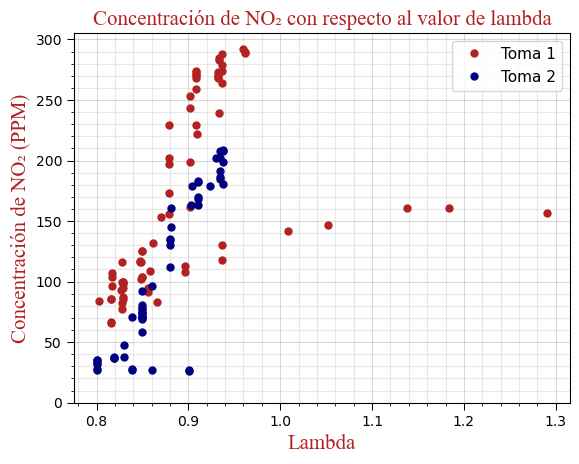

In [37]:
plt.plot(df["Lambda"],df["NO2"],linestyle=" ",marker="o",markersize=5,color="firebrick",label="Toma 1")
plt.plot(df2["Lambda"],df2["NO2"],linestyle=" ",marker="o",markersize=5,color="navy",label="Toma 2",)
grafica("Concentración de NO₂ con respecto al valor de lambda","Lambda","Concentración de NO₂ (PPM)")

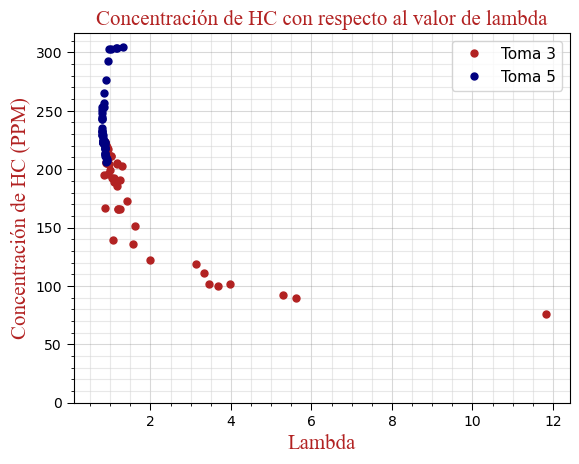

In [38]:
plt.plot(df3["Lambda"],df3["HC"],linestyle=" ",marker="o",markersize=5,color="firebrick",label="Toma 3")
plt.plot(df5["Lambda"],df5["HC"],linestyle=" ",marker="o",markersize=5,color="navy",label="Toma 5")
plt.xlim([0.1,None])
grafica("Concentración de HC con respecto al valor de lambda","Lambda","Concentración de HC (PPM)")

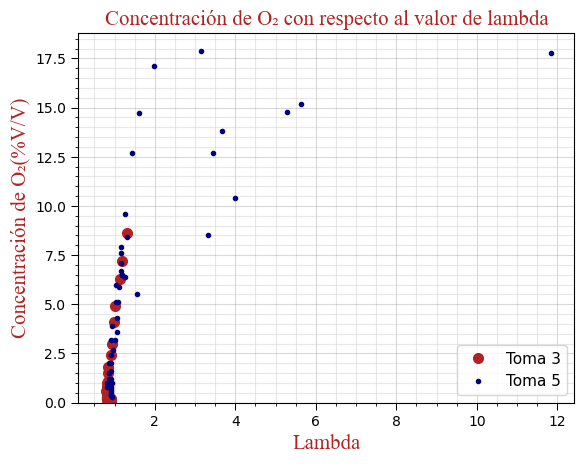

In [39]:
plt.plot(df5["Lambda"],df5["O2"],linestyle=" ",marker="o",markersize=7,color="firebrick",label="Toma 3")
plt.plot(df3["Lambda"],df3["O2"],linestyle=" ",marker="o",markersize=3,color="navy",label="Toma 5")
plt.xlim([0.1,None])
grafica("Concentración de O₂ con respecto al valor de lambda","Lambda","Concentración de O₂(%V/V)")

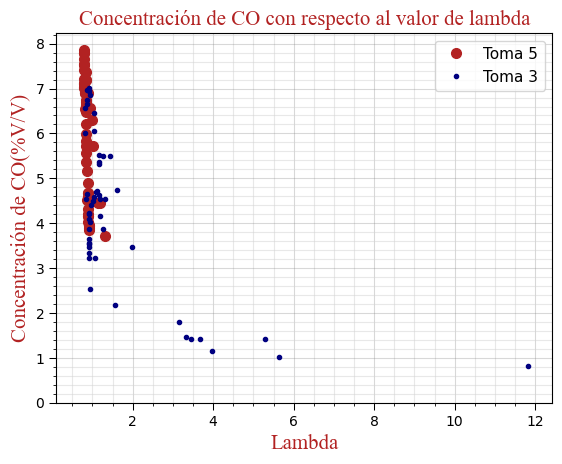

In [40]:
plt.plot(df5["Lambda"],df5["CO"],linestyle=" ",marker="o",markersize=7,color="firebrick",label="Toma 5")
plt.plot(df3["Lambda"],df3["CO"],linestyle=" ",marker="o",markersize=3,color="navy",label="Toma 3")
plt.xlim([0.1,None])
grafica("Concentración de CO con respecto al valor de lambda","Lambda","Concentración de CO(%V/V)")

In [41]:
MWco2=44.01
MWco=28.01
Vcc=0.124
D=0.000632968
r_eng=24/21
V_est=22.414

In [42]:
for df_analisis in dfs:
    df_analisis["Emision CO2"]=((df_analisis["CO2"]/100)*MWco2*Vcc)/(2*r_eng*(D/2)*V_est)
    df_analisis["Emision CO"]=((df_analisis["CO"]/100)*MWco*Vcc)/(2*r_eng*(D/2)*V_est)

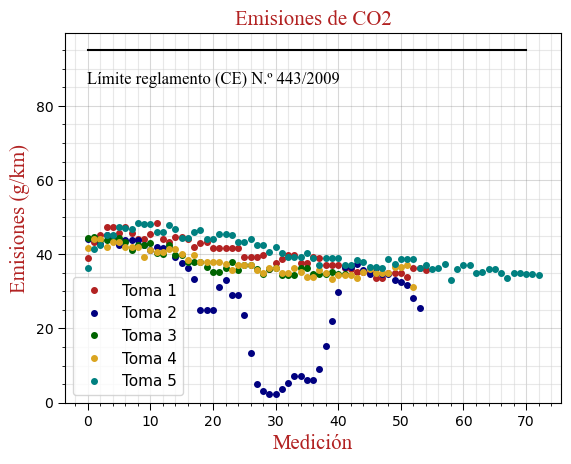

In [43]:
colors=["","firebrick","navy","darkgreen","goldenrod","teal"]
for i in range(1,6):
    plt.plot(dfs[i].index,dfs[i]["Emision CO2"],linestyle=" ",marker="o",markersize=4,label=f"Toma {i}",color=colors[i])
plt.plot([0,70],[95,95],color="black")
plt.annotate("Límite reglamento (CE) N.º 443/2009",
    xy=(20,85), 
    xytext=(20,85),
    ha='center',             
    va='bottom',
    fontsize=12, 
    family='Times New Roman', 
    color="black"
)
grafica("Emisiones de CO2","Medición","Emisiones (g/km)")

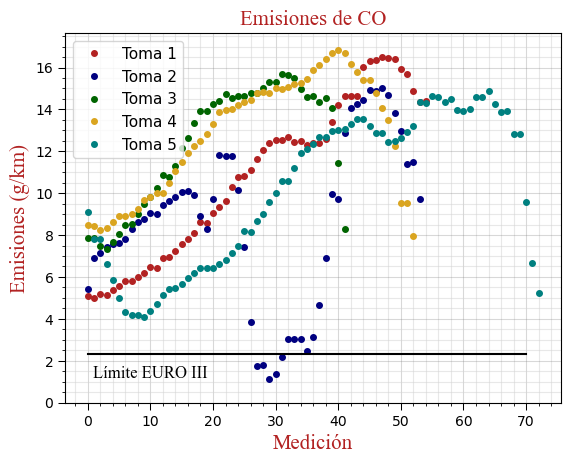

In [44]:
for i in range(1,6):
    plt.plot(dfs[i].index,dfs[i]["Emision CO"],linestyle=" ",marker="o",markersize=4,label=f"Toma {i}",color=colors[i])
plt.plot([0,70],[2.3,2.3],color="black")
plt.annotate("Límite EURO III",
    xy=(10,1), 
    xytext=(10,1),
    ha='center',             
    va='bottom',
    fontsize=12, 
    family='Times New Roman', 
    color="black"
)
grafica("Emisiones de CO","Medición","Emisiones (g/km)")